# CM50266 Lab1 
### Deadline 
* __Lab Due:__ Friday, 12 November 2021, 8:00 PM
* __Peer Assessment Due:__ 8pm 19th November 2021. (End of week 7) 
* __Marks:__ ?/10 (10% of overall unit mark.)

### Data
You are provided with __four data files__ that contain daily values of outdoor temperature, indoor temperature + humidity, barometric pressure and rainfall covering a year. They are in CSV format. They have been uploaded to the unit Moodle page and can be found in lab1data.zip.

### Task 1
1. Does the program __correctly parse the csv file__ into a python data structure?
2. Does the program correctly deal with mal-formed input, that is does it __avoid throwing unhandled exceptions?__
3. Is the code that reads the csv file wrapped in a function that takes a filename as input and returns the data? And does it __avoid use of any existing csv reading and parsing library__ such as Pandas for the file handling?
4. Does the program __correctly output__ a minimum, maximum, mean and standard deviation for each component?
5. Has a complete set of plots been provided to allow __identification of correlations__ between variables?

### Task 2
1. Do both infographics illustrate all the required __summary facts__ without misrepresenting the data?
2. Do the infographics employ effective visual mappings (encodings of data as visual properties) according to __Mackinlay’s ranking__ of visual properties, and are these __justified in the report?__
3. Do the infographics enable __effective (fast and accurate) comparisons__ between monthly and seasonal values?
4. Do the infographics use __colour effectively to draw attention__ and encode data, and is the use of colour justified in the report?
5. Do the infographics integrate __text/labels effectively__ without adding unnecessary ‘chart junk’?

## -----------------------------------------------------------------------------------------------------------

## Data
After inspecting data, some file has missing data (the number of rows does not match with other files). The following are some changes in the file in order to build consistency among the files.
1. In rainfall-last-year.csv, there are missing data on 21/12/2016 and 17/5/2017. Therefore, the data with 1.1 and 0 mm have been added respectively to the file to create the same amount of data as other files.
2. In indoor-temperature-last-year.csv, one missing date is 22/7/2017. The column humidity, temperature, temperature_range (low), and temperature_range (high) are filled with 53, 23.89, 22.8, and 24.7 accordingly.

The data that has been added to those files are the same as the data on its prior date. From my perspective, the likelihood that the whether components would be the same as the day before is higher than that from the mean. While I would not like to make a huge difference between data on the missing date and data around that date by adding mean value to it, I decided to mock it with the data from the prior date.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import seaborn as sn

%matplotlib inline

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


## Task 1
### 1. Parsing the csv file
This section is for manually loading csv file:
* input = file name
* return = data
* avoid throwing unhandled exceptions

In [2]:
#Function for manually reading csv file
def read_csv(file_name):
    try:
        #Giving the correct encoding so that the BOM is omitted in the result
        with open(file_name, encoding='utf-8-sig') as csv_file:
            data = []
            csv_contents = csv_file.read()
            for line in csv_contents.split('\n'):
                #Skip the blank line
                if line != '':
                    items = line.replace('\"','').split(',')
                    list_item = []
                    for item in items:
                        #Append item to list and if could convert to float, then do so
                        try:
                            list_item.append(float(item))
                        except ValueError:
                            list_item.append(item)
                    data.append(list_item)
                #Checking type of data -- float or str
                #print(type(data[1][1]))
            return data
    #Handling error from non-existing file
    except FileNotFoundError:
        print('File not found: ', file_name)

    #Handling another error from reading the csv file
    ############################################### this seems not to be ok, bc you wont know what's the error is...
    except Exception:
        print('Found some error reading file: ', file_name)

In [3]:
#Read files using the read_csv function
outdoor_temp = read_csv('./data/outside-temperature-last-year.csv')
indoor_temp = read_csv('./data/indoor-temperature-last-year.csv')
baro_pressure = read_csv('./data/barometer-last-year.csv')
rainfall = read_csv('./data/rainfall-last-year.csv')

# print(outdoor_temp)

### 2. Math
This section is for computing each component of the weather data:
* minimum
* maximum
* mean
* standard deviation

In [4]:
#Function for pd's dataframe 
def to_df(data):
    fields = data.pop(0)
    df = pd.DataFrame(data, columns=fields)
    return df

In [5]:
#Convert data to pandas' dataframe
df_outdoor_temp = to_df(outdoor_temp)
df_indoor_temp = to_df(indoor_temp)
df_baro_pressure = to_df(baro_pressure)
df_rainfall = to_df(rainfall)

#Update DateTime format
df_indoor_temp['DateTime'] = pd.to_datetime(df_indoor_temp['DateTime'], dayfirst=True)
df_outdoor_temp['DateTime'] = pd.to_datetime(df_outdoor_temp['DateTime'], dayfirst=True)
df_baro_pressure['DateTime'] = pd.to_datetime(df_baro_pressure['DateTime'], dayfirst=True)
df_rainfall['DateTime'] = pd.to_datetime(df_rainfall['DateTime'], dayfirst=True)

#Update column name
df_indoor_temp = df_indoor_temp.rename(columns={"Temperature":"IndoorTemp", "Temperature_range (low)":"IndoorLowTempRange", "Temperature_range (high)":"IndoorHighTempRange"})
df_outdoor_temp = df_outdoor_temp.rename(columns={"Temperature":"OutdoorTemp", "Temperature_range (low)":"OutdoorLowTempRange", "Temperature_range (high)":"OutdoorHighTempRange"})

In [6]:
#Merge all data frames together
all_data_frames = [df_outdoor_temp, df_indoor_temp, df_baro_pressure, df_rainfall]
merged_data_frames = reduce(lambda  a,b: pd.merge(a,b,on=['DateTime'], how='outer'), all_data_frames)

#Display min, max, mean, std
describe_df = merged_data_frames.describe()
describe_df

,OutdoorTemp,OutdoorLowTempRange,OutdoorHighTempRange,Humidity,IndoorTemp,IndoorLowTempRange,IndoorHighTempRange,Baro,mm
count,355.000000,355.000000,355.000000,354.000000,354.000000,354.000000,354.000000,355.000000,353.000000
mean,11.138877,7.865634,15.524225,48.519774,21.827885,20.555932,23.533616,1009.998873,1.548725
std,5.355042,4.878930,7.034445,5.188886,2.058307,2.405125,1.701466,9.869662,3.324599
min,-1.810000,-4.100000,1.500000,37.000000,18.040000,14.900000,19.700000,979.600000,0.000000
25%,7.390000,4.350000,10.250000,44.000000,20.345000,18.725000,22.500000,1004.850000,0.000000
50%,10.960000,8.000000,15.100000,48.000000,21.710000,20.600000,23.200000,1010.500000,0.000000
75%,15.050000,12.050000,19.850000,52.000000,22.710000,21.900000,24.100000,1016.050000,1.100000
max,26.380000,18.700000,38.500000,59.000000,29.210000,28.200000,31.100000,1035.600000,23.200000


### 3. Checking correlations
This section is for checking correlations between weather components:
* plot pairs of the data 

In [7]:
#Correlation of each component
corr_df = merged_data_frames.corr()
corr_df

,OutdoorTemp,OutdoorLowTempRange,OutdoorHighTempRange,Humidity,IndoorTemp,IndoorLowTempRange,IndoorHighTempRange,Baro,mm
OutdoorTemp,1.000000,0.954362,0.952036,0.644720,0.902442,0.937128,0.734264,-0.157571,0.024175
OutdoorLowTempRange,0.954362,1.000000,0.839464,0.690491,0.834862,0.894525,0.637049,-0.199476,0.077210
OutdoorHighTempRange,0.952036,0.839464,1.000000,0.540705,0.897245,0.899350,0.779789,-0.087452,-0.062459
Humidity,0.644720,0.690491,0.540705,1.000000,0.481282,0.570255,0.247138,-0.200786,0.170841
IndoorTemp,0.902442,0.834862,0.897245,0.481282,1.000000,0.978688,0.911397,-0.101517,-0.015083
IndoorLowTempRange,0.937128,0.894525,0.899350,0.570255,0.978688,1.000000,0.826338,-0.144429,0.037975
IndoorHighTempRange,0.734264,0.637049,0.779789,0.247138,0.911397,0.826338,1.000000,-0.036803,-0.110527
Baro,-0.157571,-0.199476,-0.087452,-0.200786,-0.101517,-0.144429,-0.036803,1.000000,-0.479349
mm,0.024175,0.077210,-0.062459,0.170841,-0.015083,0.037975,-0.110527,-0.479349,1.000000


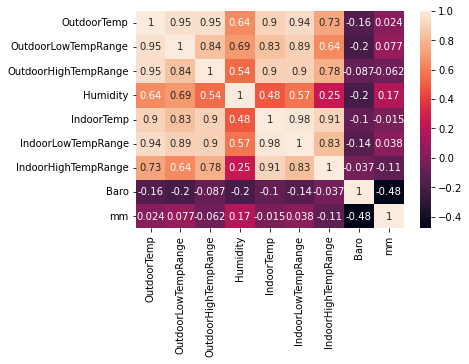

In [8]:
sn.heatmap(corr_df, annot=True)
plt.show()

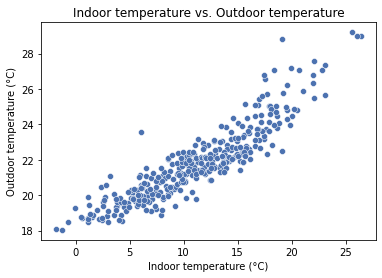

In [9]:
sn.set_palette("deep")
a = sn.scatterplot(x="OutdoorTemp", y="IndoorTemp", data=merged_data_frames)
a.set_title("Indoor temperature vs. Outdoor temperature")
a.set_xlabel("Indoor temperature (°C)");
a.set_ylabel("Outdoor temperature (°C)");
plt.show()

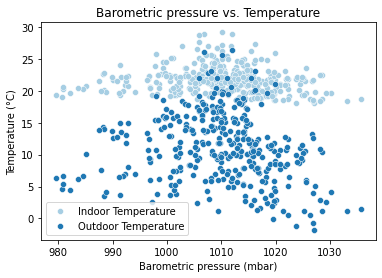

In [10]:
sn.set_palette("Paired")
b = sn.scatterplot(x="Baro", y="IndoorTemp", data=merged_data_frames)
b = sn.scatterplot(x="Baro", y="OutdoorTemp", data=merged_data_frames)
plt.legend(labels=['Indoor Temperature', 'Outdoor Temperature'])
b.set_title("Barometric pressure vs. Temperature")
b.set_xlabel("Barometric pressure (mbar)");
b.set_ylabel("Temperature (°C)");
plt.show()

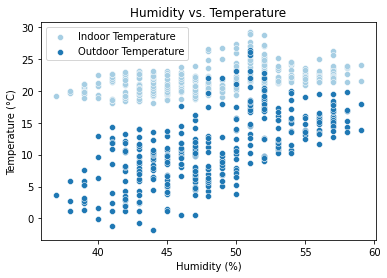

In [11]:
sn.set_palette("Paired")
c = sn.scatterplot(x="Humidity", y="IndoorTemp", data=merged_data_frames)
c = sn.scatterplot(x="Humidity", y="OutdoorTemp", data=merged_data_frames)
plt.legend(labels=['Indoor Temperature', 'Outdoor Temperature'])
c.set_title("Humidity vs. Temperature")
c.set_xlabel("Humidity (%)");
c.set_ylabel("Temperature (°C)");
plt.show()

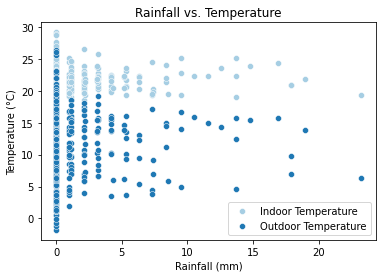

In [12]:
sn.set_palette("Paired")
d = sn.scatterplot(x="mm", y="IndoorTemp", data=merged_data_frames)
d = sn.scatterplot(x="mm", y="OutdoorTemp", data=merged_data_frames)
plt.legend(labels=['Indoor Temperature', 'Outdoor Temperature'])
d.set_title("Rainfall vs. Temperature")
d.set_xlabel("Rainfall (mm)");
d.set_ylabel("Temperature (°C)");
plt.show()

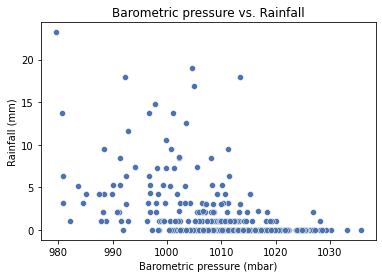

In [13]:
sn.set_palette("deep")
e = sn.scatterplot(x="Baro", y="mm", data=merged_data_frames)
e.set_title("Barometric pressure vs. Rainfall")
e.set_xlabel("Barometric pressure (mbar)");
e.set_ylabel("Rainfall (mm)");
plt.show()

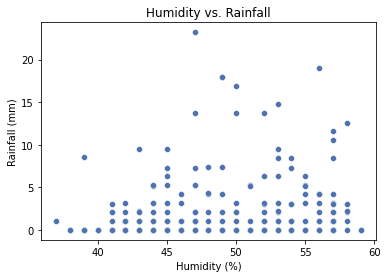

In [14]:
sn.set_palette("deep")
f = sn.scatterplot(x="Humidity", y="mm", data=merged_data_frames)
f.set_title("Humidity vs. Rainfall")
f.set_xlabel("Humidity (%)");
f.set_ylabel("Rainfall (mm)");
plt.show()

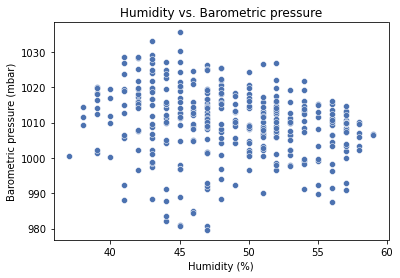

In [15]:
sn.set_palette("deep")
g = sn.scatterplot(x="Humidity", y="Baro", data=merged_data_frames)
g.set_title("Humidity vs. Barometric pressure")
g.set_xlabel("Humidity (%)");
g.set_ylabel("Barometric pressure (mbar)");
plt.show()

## Task 2
### 1. Extend  code to summarise the data into monthly values


In [16]:
merged_data_frames['Month'] = pd.DatetimeIndex(merged_data_frames['DateTime']).month
grouped_df = merged_data_frames.groupby('Month')
# sum_grouped_df = grouped_df.sum()
# sum_grouped_df = sum_grouped_df.reset_index()
# sum_grouped_df
avg_grouped_df = grouped_df.mean()
avg_grouped_df = avg_grouped_df.reset_index()

avg_grouped_df

,Month,OutdoorTemp,OutdoorLowTempRange,OutdoorHighTempRange,Humidity,IndoorTemp,IndoorLowTempRange,IndoorHighTempRange,Baro,mm
0,1,4.424839,1.780645,7.090323,42.483871,19.563226,17.532258,22.709677,1015.422581,1.158065
1,2,6.312500,4.342857,8.914286,43.178571,20.252857,18.571429,22.896429,1005.757143,1.164286
2,3,8.982333,5.960000,13.256667,46.266667,21.132333,19.620000,23.286667,1006.503333,1.020000
3,4,10.305667,5.986667,15.890000,43.700000,22.097667,20.733333,23.633333,1015.373333,0.243333
4,5,14.531613,10.041935,21.132258,45.096774,23.202581,22.183871,24.435484,1008.864516,1.406667
5,6,17.601000,13.196667,23.566667,51.533333,24.697333,23.796667,25.800000,1006.083333,1.506667
6,7,18.156129,14.200000,24.209677,53.033333,24.615000,23.820000,25.643333,1006.745161,3.093548
7,8,16.655909,13.090909,22.431818,57.000000,23.488636,22.727273,24.568182,1009.113636,1.722727
8,9,14.125000,10.816667,19.023333,55.166667,22.066333,21.303333,22.983333,1005.846667,2.386667
9,10,11.154727,8.537500,14.650000,52.718750,21.363164,20.318750,22.646875,1013.328125,0.925000


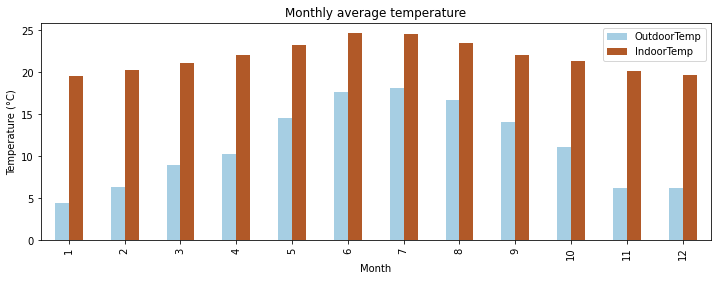

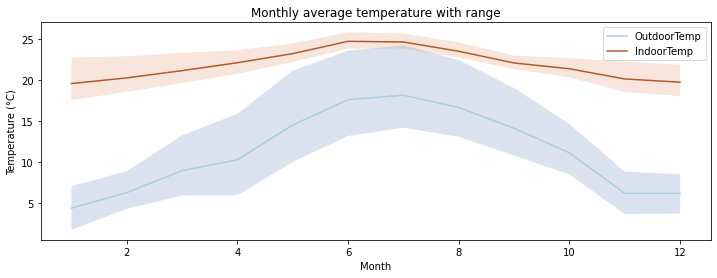

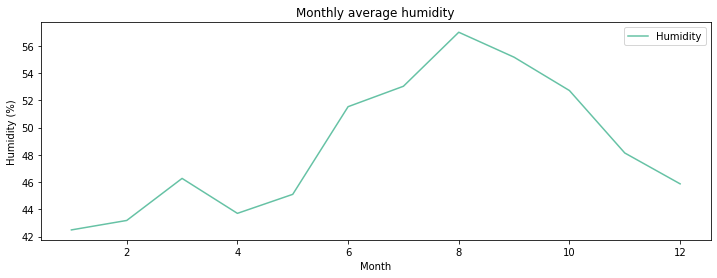

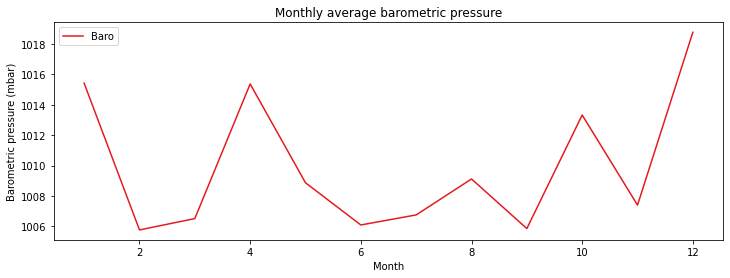

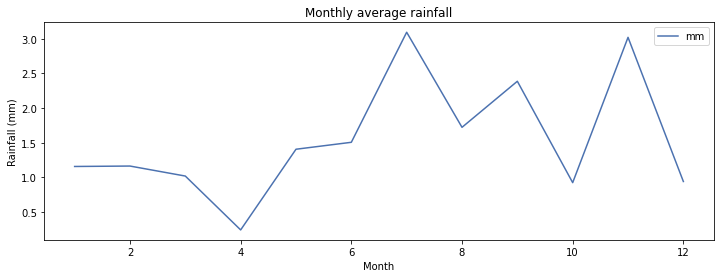

In [17]:
h = avg_grouped_df.plot.bar(x='Month', y=['OutdoorTemp', 'IndoorTemp'], figsize=(12,4), colormap='Paired')
h.set_title("Monthly average temperature")
h.set_xlabel("Month");
h.set_ylabel("Temperature (°C)");

i = avg_grouped_df.plot.line(x='Month', y=['OutdoorTemp', 'IndoorTemp'], figsize=(12,4), colormap='Paired')
i.fill_between(avg_grouped_df.Month, avg_grouped_df.OutdoorLowTempRange, avg_grouped_df.OutdoorHighTempRange, alpha=0.2) #this is the shaded error
i.fill_between(avg_grouped_df.Month, avg_grouped_df.IndoorLowTempRange, avg_grouped_df.IndoorHighTempRange, alpha=0.2) #this is the shaded error
i.set_title("Monthly average temperature with range")
i.set_xlabel("Month");
i.set_ylabel("Temperature (°C)")

j = avg_grouped_df.plot.line(x='Month', y='Humidity', figsize=(12,4), colormap='Set2')
j.set_title("Monthly average humidity")
j.set_xlabel("Month");
j.set_ylabel("Humidity (%)");

k = avg_grouped_df.plot.line(x='Month', y='Baro', figsize=(12,4), colormap='Set1')
k.set_title("Monthly average barometric pressure")
k.set_xlabel("Month");
k.set_ylabel("Barometric pressure (mbar)");

l = avg_grouped_df.plot.line(x='Month', y='mm', figsize=(12,4))
l.set_title("Monthly average rainfall")
l.set_xlabel("Month");
l.set_ylabel("Rainfall (mm)");


plt.show()

### 2. Extend  code to summarise the data into seasonable values


In [18]:
season_month = {11:'Nov-Jan', 12:'Nov-Jan', 1:'Nov-Jan',
            2:'Feb-Apr', 3:'Feb-Apr', 4:'Feb-Apr', 
            5:'May-Jul', 6:'May-Jul', 7:'May-Jul',
            8:'Aug-Oct', 9:'Aug-Oct', 10:'Aug-Oct'}

season_list = []
for month in merged_data_frames['Month']:
    season = season_month.get(month)
    season_list.append(season)
    
merged_data_frames['Season'] = season_list

grouped_ss_df = merged_data_frames.groupby('Season')
avg_ss_grouped_df = grouped_ss_df.mean()
avg_ss_grouped_df = avg_ss_grouped_df.reset_index()
avg_ss_grouped_df = avg_ss_grouped_df.reindex([3,1,2,0])
avg_ss_grouped_df

,Season,OutdoorTemp,OutdoorLowTempRange,OutdoorHighTempRange,Humidity,IndoorTemp,IndoorLowTempRange,IndoorHighTempRange,Baro,mm,Month
3,Nov-Jan,5.609121,3.068132,8.148352,45.461538,19.803077,18.029670,22.271429,1013.882418,1.708889,7.923077
1,Feb-Apr,8.583977,5.454545,12.772727,44.409091,21.181591,19.665909,23.280682,1009.289773,0.801136,3.022727
2,May-Jul,16.753804,12.471739,22.963043,49.835165,24.160989,23.254945,25.283516,1007.243478,2.014286,6.000000
0,Aug-Oct,13.656324,10.544048,18.250000,54.714286,22.170967,21.301190,23.270238,1009.552381,1.655952,9.119048


In [19]:
min_ss_grouped_df = grouped_ss_df.min()
min_ss_grouped_df = min_ss_grouped_df.reset_index()
min_ss_grouped_df = min_ss_grouped_df.reindex([3,1,2,0])
min_ss_grouped_df

,Season,DateTime,OutdoorTemp,OutdoorLowTempRange,OutdoorHighTempRange,Humidity,IndoorTemp,IndoorLowTempRange,IndoorHighTempRange,Baro,mm,Month
3,Nov-Jan,2016-11-01,-1.81,-4.1,1.5,37.0,18.04,14.9,19.7,979.6,0.0,1
1,Feb-Apr,2017-02-01,1.30,-0.3,2.1,38.0,18.90,16.5,22.2,980.8,0.0,2
2,May-Jul,2017-05-01,10.53,4.2,13.8,40.0,21.76,20.6,21.9,988.2,0.0,5
0,Aug-Oct,2016-10-09,7.90,3.7,10.1,49.0,20.38,19.0,21.8,987.4,0.0,8


In [20]:
max_ss_grouped_df = grouped_ss_df.max()
max_ss_grouped_df = max_ss_grouped_df.reset_index()
max_ss_grouped_df = max_ss_grouped_df.reindex([3,1,2,0])

max_ss_grouped_df

,Season,DateTime,OutdoorTemp,OutdoorLowTempRange,OutdoorHighTempRange,Humidity,IndoorTemp,IndoorLowTempRange,IndoorHighTempRange,Baro,mm,Month
3,Nov-Jan,2017-01-31,12.83,12.2,14.1,52.0,23.57,20.8,25.2,1035.6,23.2,12
1,Feb-Apr,2017-04-30,14.21,11.7,22.4,52.0,23.16,21.7,25.3,1028.6,6.3,4
2,May-Jul,2017-07-31,26.38,18.7,38.5,57.0,29.21,28.2,31.1,1019.9,19.0,7
0,Aug-Oct,2017-10-09,19.87,16.6,31.0,59.0,26.21,25.0,28.2,1026.9,12.6,10


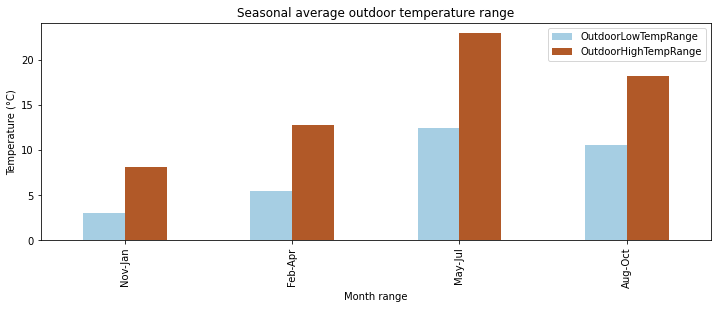

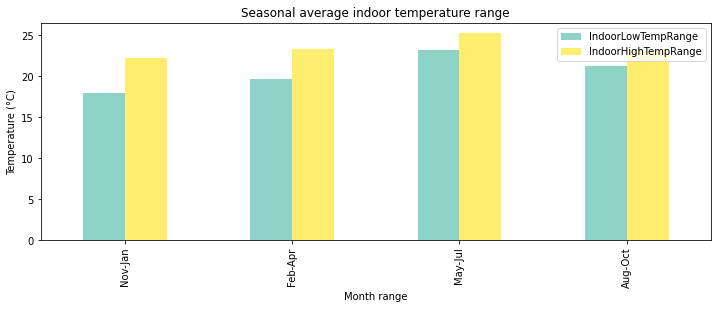

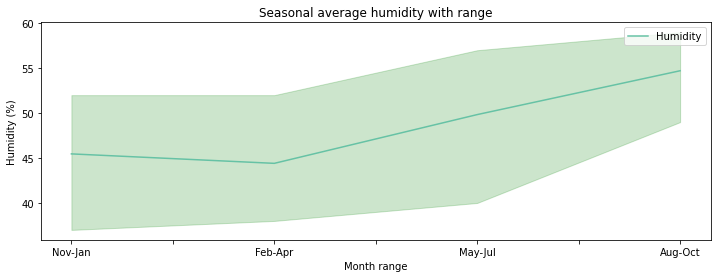

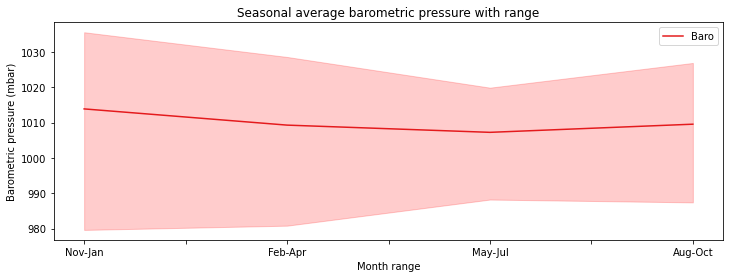

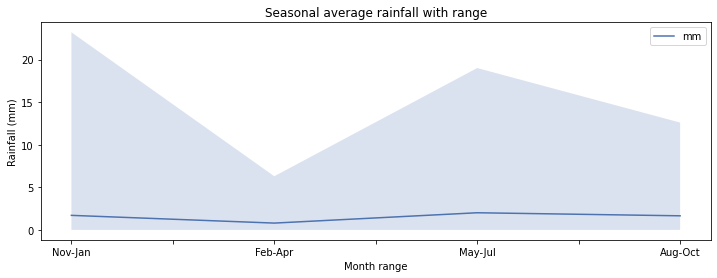

In [21]:
m = avg_ss_grouped_df.plot.bar(x='Season', y=['OutdoorLowTempRange', 'OutdoorHighTempRange'], figsize=(12,4), colormap='Paired')
m.set_title("Seasonal average outdoor temperature range")
m.set_xlabel("Month range");
m.set_ylabel("Temperature (°C)")

n = avg_ss_grouped_df.plot.bar(x='Season', y=['IndoorLowTempRange', 'IndoorHighTempRange'], figsize=(12,4), colormap='Set3')
n.set_title("Seasonal average indoor temperature range")
n.set_xlabel("Month range");
n.set_ylabel("Temperature (°C)")

o = avg_ss_grouped_df.plot.line(x='Season', y='Humidity', figsize=(12,4), colormap='Set2')
o.fill_between(avg_ss_grouped_df.Season, min_ss_grouped_df.Humidity, max_ss_grouped_df.Humidity, alpha=0.2, color='green') #this is the shaded error
o.set_title("Seasonal average humidity with range")
o.set_xlabel("Month range");
o.set_ylabel("Humidity (%)")

p = avg_ss_grouped_df.plot.line(x='Season', y='Baro', figsize=(12,4), colormap='Set1')
p.fill_between(avg_ss_grouped_df.Season, min_ss_grouped_df.Baro, max_ss_grouped_df.Baro, alpha=0.2, color='red') #this is the shaded error
p.set_title("Seasonal average barometric pressure with range")
p.set_xlabel("Month range");
p.set_ylabel("Barometric pressure (mbar)")

q = avg_ss_grouped_df.plot.line(x='Season', y='mm', figsize=(12,4))
q.fill_between(avg_ss_grouped_df.Season, min_ss_grouped_df.mm, max_ss_grouped_df.mm, alpha=0.2) #this is the shaded error
q.set_title("Seasonal average rainfall with range")
q.set_xlabel("Month range");
q.set_ylabel("Rainfall (mm)")

plt.show()

#not line graph is better

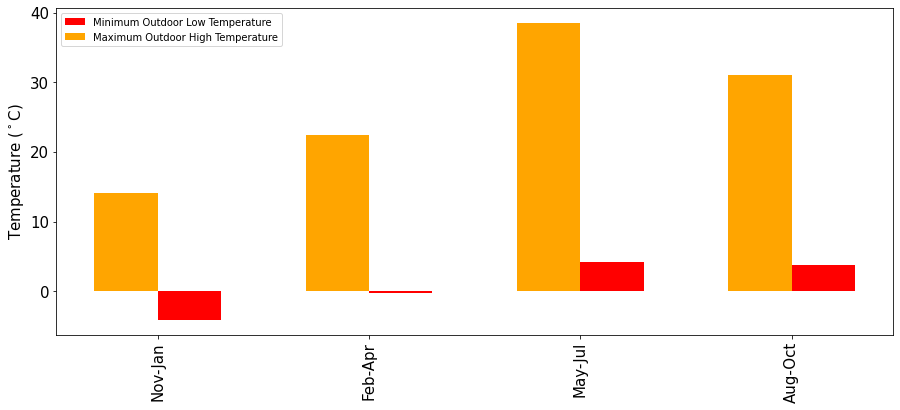

In [22]:
x=np.arange(4)
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x+0.15,min_ss_grouped_df['OutdoorLowTempRange'],label='Minimum Outdoor Low Temperature',width=0.3,color='r')
ax.bar(x-0.15,max_ss_grouped_df['OutdoorHighTempRange'],label='Maximum Outdoor High Temperature',width=0.3,color='orange')
plt.xticks(x, min_ss_grouped_df['Season'], rotation ='vertical',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Temperature ($^\circ$C)',fontsize=15)

plt.legend(loc='upper left')
plt.show()